In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset (tips)

In [5]:
df = sns.load_dataset('tips')

In [6]:
df.shape

(244, 7)

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Data Overview(basic details like data type , null values etc.)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Statistical Overview of data

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Categorical Values in sex columns

In [15]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

# Number of male and female in dataset

In [16]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

Total bill paid by Male and Female

In [17]:
df.groupby('sex')['total_bill'].sum()

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

In [18]:
df.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [19]:
df.groupby(['sex','smoker'])['total_bill'].mean()

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

In [23]:
df.groupby(['sex','smoker'])[['total_bill','tip']].sum()

total_bill     tip
sex    smoker                    
Male   Yes        1337.07  183.07
       No         1919.75  302.00
Female Yes         593.27   96.74
       No          977.68  149.77

In [49]:
df.groupby(['sex','smoker','day','time'])[['total_bill','tip']].sum().unstack()

total_bill            tip        
time                    Lunch  Dinner  Lunch  Dinner
sex    smoker day                                   
Male   Yes    Thur     191.71    0.00  30.58    0.00
              Fri       34.16  129.46   5.70   16.23
              Sat        0.00  589.62   0.00   77.74
              Sun        0.00  392.12   0.00   52.82
       No     Thur     369.73    0.00  58.83    0.00
              Fri        0.00   34.95   0.00    5.00
              Sat        0.00  637.73   0.00  104.21
              Sun        0.00  877.34   0.00  133.96
Female Yes    Thur     134.53    0.00  20.93    0.00
              Fri       39.78   48.80   7.98   10.80
              Sat        0.00  304.00   0.00   43.03
              Sun        0.00   66.16   0.00   14.00
       No     Thur     381.58   18.78  58.49    3.00
              Fri       15.98   22.75   3.00    3.25
              Sat        0.00  247.05   0.00   35.42
              Sun        0.00  291.54   0.00   46.61

# Data Visualization

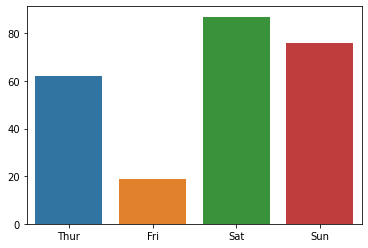

In [42]:
sns.barplot(x=day.index,y=day.values)
plt.show()

On Saturday More number of Visitors

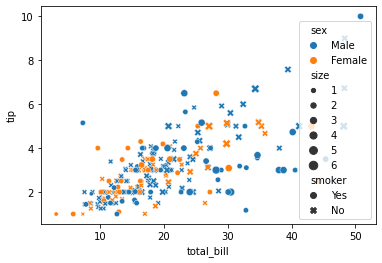

In [47]:
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(df['total_bill'],df['tip'],hue=df['sex'],style=df['smoker'],size=df['size'])
plt.show()

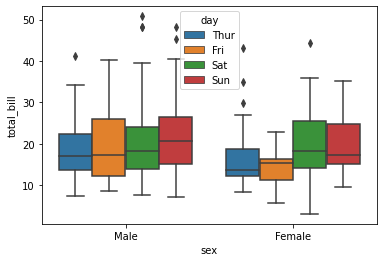

In [53]:
sns.boxplot(df['sex'],df['total_bill'],hue=df['day'])
plt.show()